
# Data Analytics - Exploring E-Commerce Public Dataset on [Kaggle ](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

##📚Libraries

In [135]:
#Data manipulation
import numpy as np
import pandas as pd

#Data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
from scipy.stats import ttest_ind


## 💾 E-commerce dataset csv

In [136]:
#csv dataset in data frame
df_orders_dataset=pd.read_csv('/content/olist_orders_dataset.csv')
df_customers=pd.read_csv('/content/olist_customers_dataset.csv')
df_orders_items=pd.read_csv('/content/olist_order_items_dataset.csv')
df_orders_payments=pd.read_csv('/content/olist_order_payments_dataset.csv')
df_reviews=pd.read_csv('/content/olist_order_reviews_dataset.csv')
df_products=pd.read_csv('/content/olist_products_dataset.csv')
df_sellers=pd.read_csv('/content/olist_sellers_dataset.csv')

### ERD Diagram

# 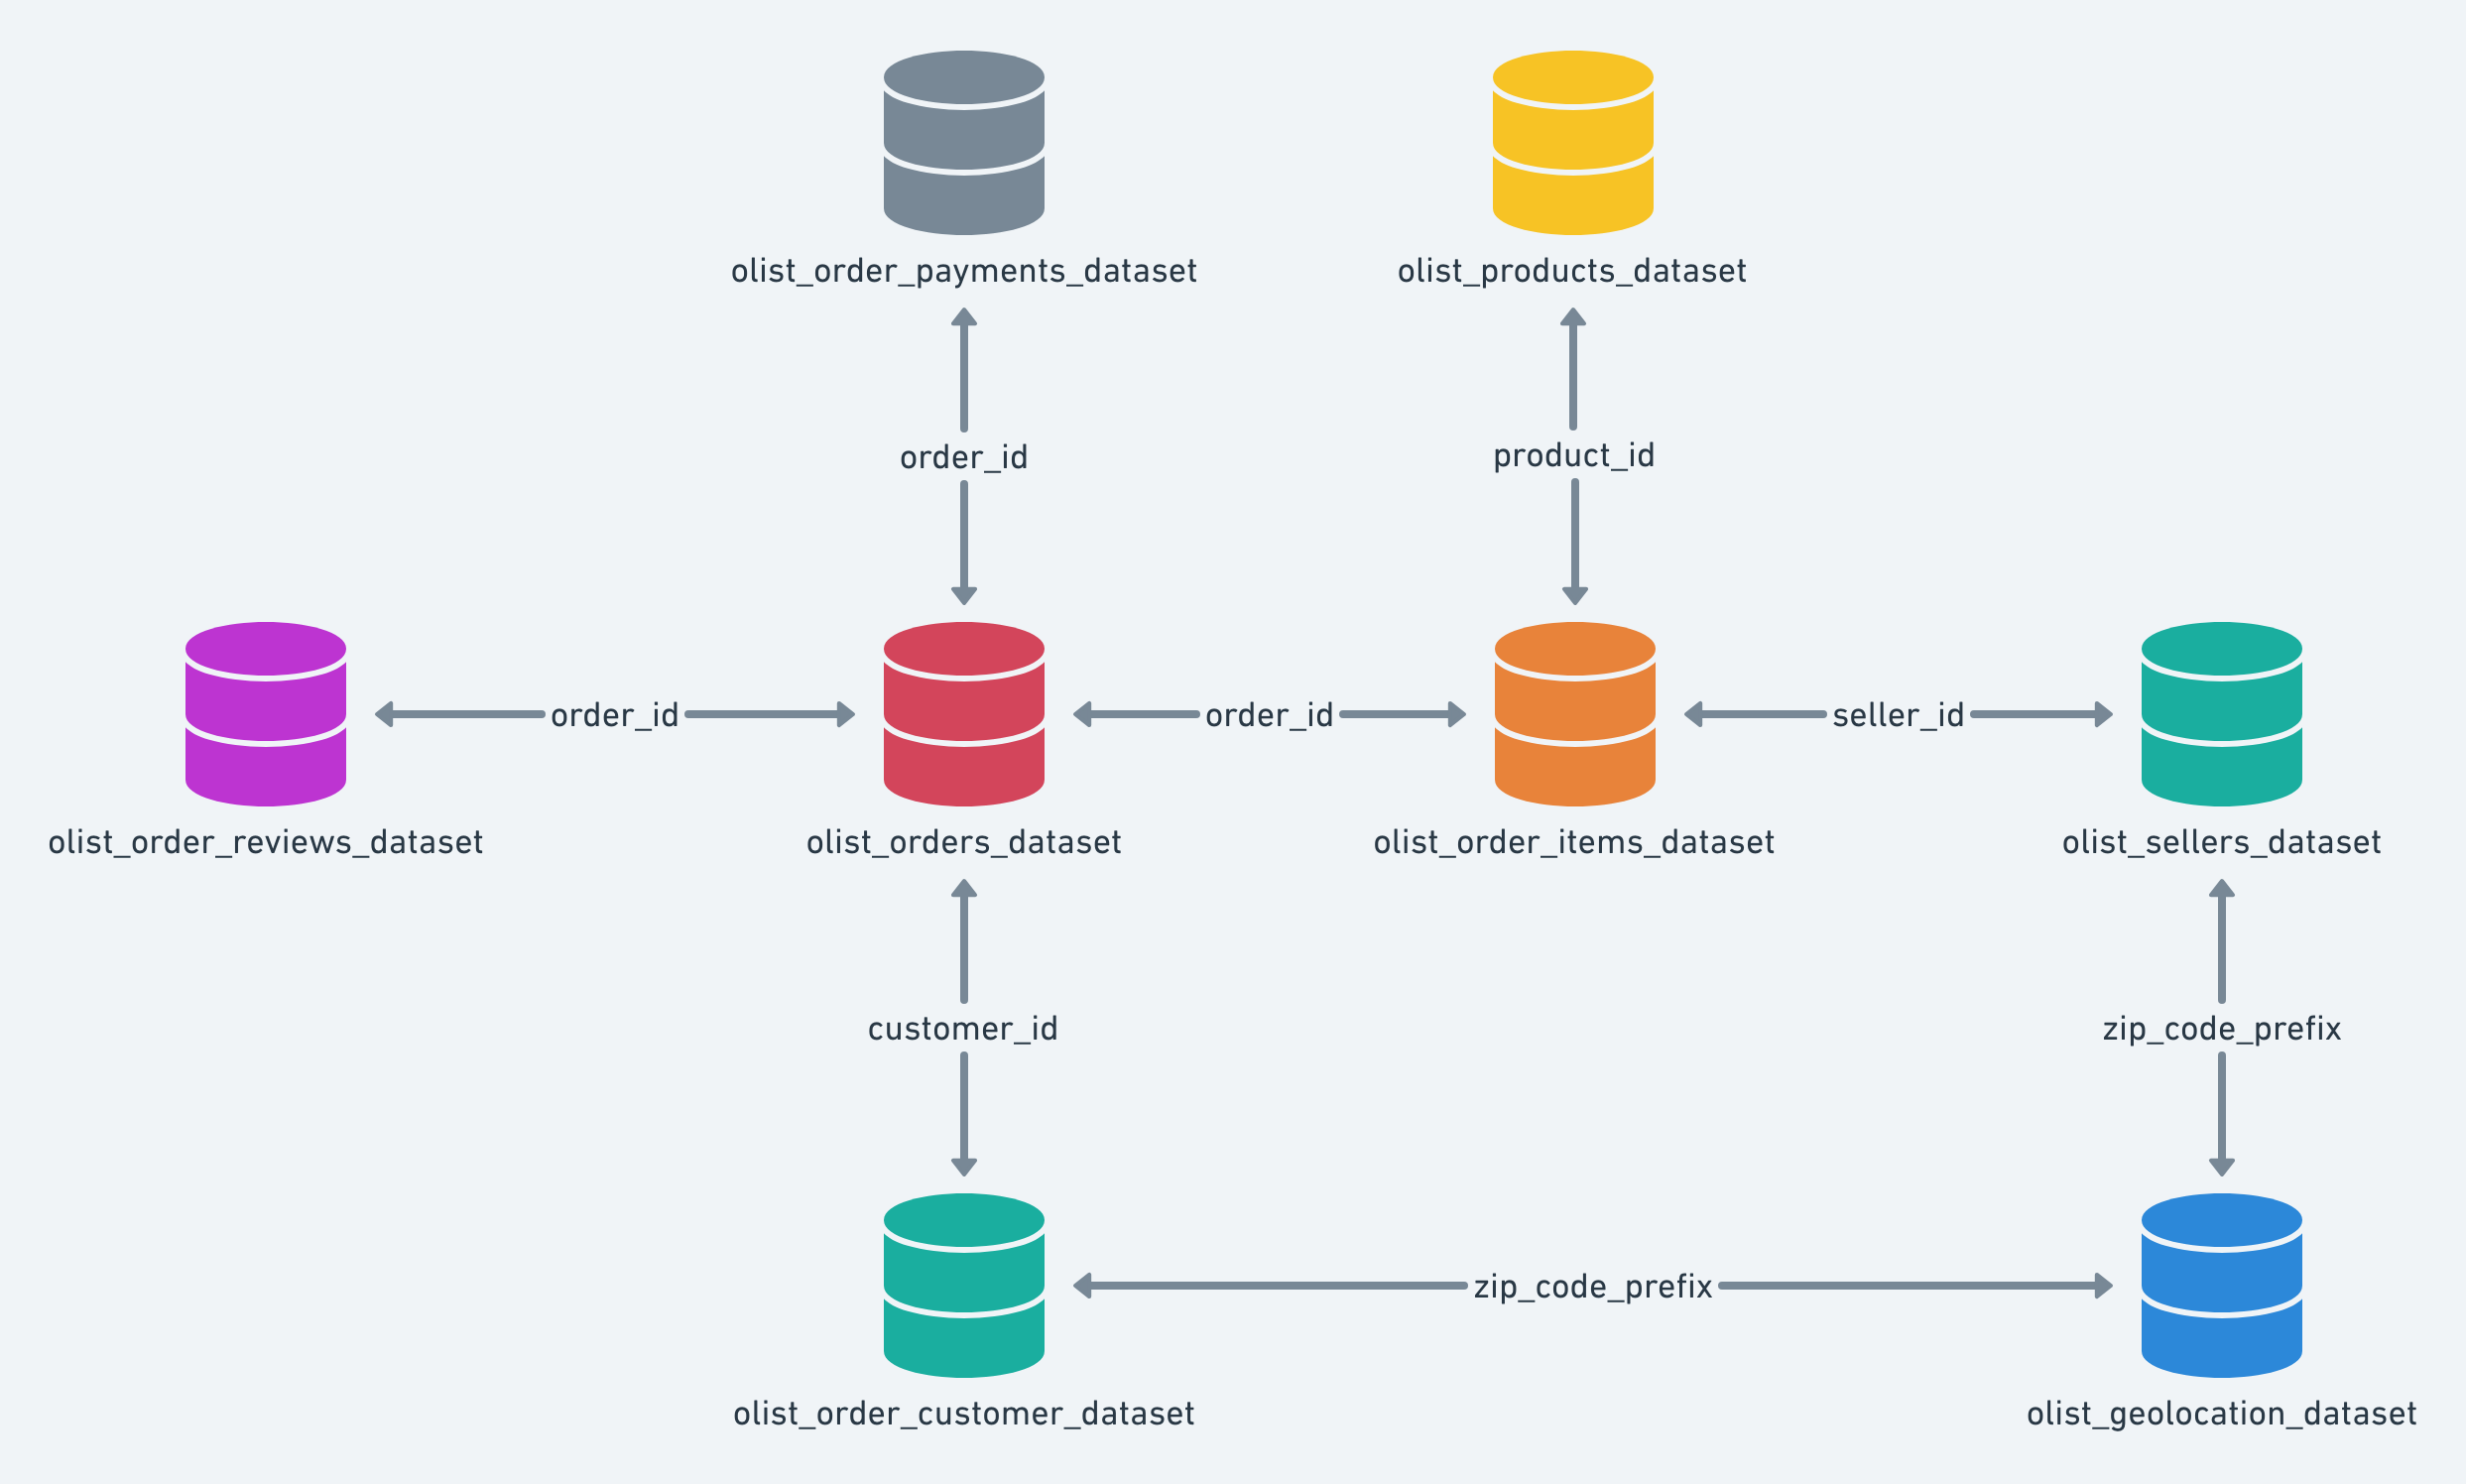

##🚀 Getting started

### Data info

In [137]:
df_orders_dataset.shape
df_orders_items.shape
df_products.shape
df_customers.shape
df_orders_payments.shape
df_reviews.shape


(99224, 7)

In [138]:
df_orders_dataset.head()
df_orders_items.head()
df_products.head()
df_customers.head()
df_orders_payments.head()
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [139]:
df_orders_dataset.info()
df_orders_items.info()
df_products.info()
df_customers.info()
df_orders_payments.info()
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 

### Remove duplicates

In [140]:
#Duplicates
print(df_orders_dataset.duplicated().sum())
print(df_orders_items.duplicated().sum())
print(df_products.duplicated().sum())
print(df_customers.duplicated().sum())
print(df_orders_payments.duplicated().sum())
print(df_reviews.duplicated().sum())
#no duplicated data

0
0
0
0
0
0


###  Date format

In [141]:
#date en date format for all data frame
# create one data frame
dfs = {
    "orders": df_orders_dataset,
    "customers": df_customers,
    "order_items": df_orders_items,
    "order_payments": df_orders_payments,
    "reviews": df_reviews,
    "products": df_products,
    "sellers": df_sellers,
}

# For loop: date/timestamp
for name, df in dfs.items():
    for col in df.columns:
        if 'date' in col.lower() or 'timestamp' in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')
            print(f"✅ {col} convertie en datetime dans {name}")#print if converted


✅ order_purchase_timestamp convertie en datetime dans orders
✅ order_delivered_carrier_date convertie en datetime dans orders
✅ order_delivered_customer_date convertie en datetime dans orders
✅ order_estimated_delivery_date convertie en datetime dans orders
✅ shipping_limit_date convertie en datetime dans order_items
✅ review_creation_date convertie en datetime dans reviews
✅ review_answer_timestamp convertie en datetime dans reviews


In [142]:
#checking dates results
df_orders_dataset.info()
df_orders_items.info()
df_products.info()
df_customers.info()
df_orders_payments.info()
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype     

### Missing values

In [143]:
#Missing values
print(df_orders_dataset.isna().sum()) #missing values, we won't need these dates here
print(df_orders_items.isna().sum())
print(df_products.isna().sum()) #missing values, check category_name (see below)
print(df_customers.isna().sum())
print(df_orders_payments.isna().sum())
print(df_reviews.isna().sum()) #missing review comment title and message, we won't need it here

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id     

Product missing values : how to handle it ?

In [144]:
#missing values, 610 category_name
df_products.isna().sum()
df_products['product_category_name'].describe()
df_products['product_category_name'].nunique()
missing_percentage = df_products['product_category_name'].isna().mean() * 100
missing_percentage
#1.8% of missing values in category name

#replace by unknown
df_products['product_category_name'].fillna('unknown', inplace=True)



<ipython-input-144-7f4bc615bc22>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_category_name'].fillna('unknown', inplace=True)


In [145]:
#product weight, length, height and width missing
# replace by the average value
df_products["product_weight_g"] = df_products["product_weight_g"].fillna(df_products["product_weight_g"].mean())
df_products["product_length_cm"] = df_products["product_length_cm"].fillna(df_products["product_length_cm"].mean())
df_products["product_height_cm"] = df_products["product_height_cm"].fillna(df_products["product_height_cm"].mean())
df_products["product_width_cm"] = df_products["product_width_cm"].fillna(df_products["product_width_cm"].mean())


In [146]:
#rechecking missing values
df_products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


###Merging data

In [147]:
#merge products_dataset and orders_items_dataset

df_products_items=df_orders_items.merge(df_products,on='product_id',how='left')
df_products_items.head()
#products_items = products + orders



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [148]:
#merge detailed_orders

df_detailed_orders = df_products_items.merge(df_orders_dataset, on='order_id', how='left', suffixes=('_products', '_orders'))
df_detailed_orders.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [149]:
#merge df detailed orders and reviews
df_all=df_detailed_orders.merge(df_reviews,on='order_id',how='left')
df_all

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11,2018-05-14 12:53:47
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24,2018-07-25 09:25:29
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29,2017-10-29 21:33:52
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17,2017-08-18 12:24:05


In [150]:
#merge payments
df_all = df_all.merge(df_orders_payments, on='order_id', how='left')
df_all.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

###Create function

In [151]:
# Define the function to categorize review scores
def categorize_review_score(score):
    if score >= 4:
        return 'Excellent'
    elif score >= 3:
        return 'Good'
    elif score >= 2:
        return 'Average'
    else:
        return 'Poor'

# Apply the function to the review_score column
df_all['review_category'] = df_all['review_score'].apply(categorize_review_score)

# Check the distribution of categories
df_all['review_category'].value_counts()


,count
review_category,
Excellent,88550
Poor,15835
Good,9840
Average,4085


##🎯 KPI and data vizualisation

###Top saled products


In [152]:
# Count product
top_products = df_detailed_orders["product_category_name"].value_counts().reset_index()
# Rename columns
top_products.columns = ["product_category_name", "nombre_de_ventes"]
# Top 10 most sold products
print(top_products.head(10))


    product_category_name  nombre_de_ventes
0         cama_mesa_banho             11115
1            beleza_saude              9670
2           esporte_lazer              8641
3        moveis_decoracao              8334
4  informatica_acessorios              7827
5   utilidades_domesticas              6964
6      relogios_presentes              5991
7               telefonia              4545
8      ferramentas_jardim              4347
9              automotivo              4235


<ipython-input-153-cb8b72c4e105>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="nombre_de_ventes", y="product_category_name", palette="Blues_r")


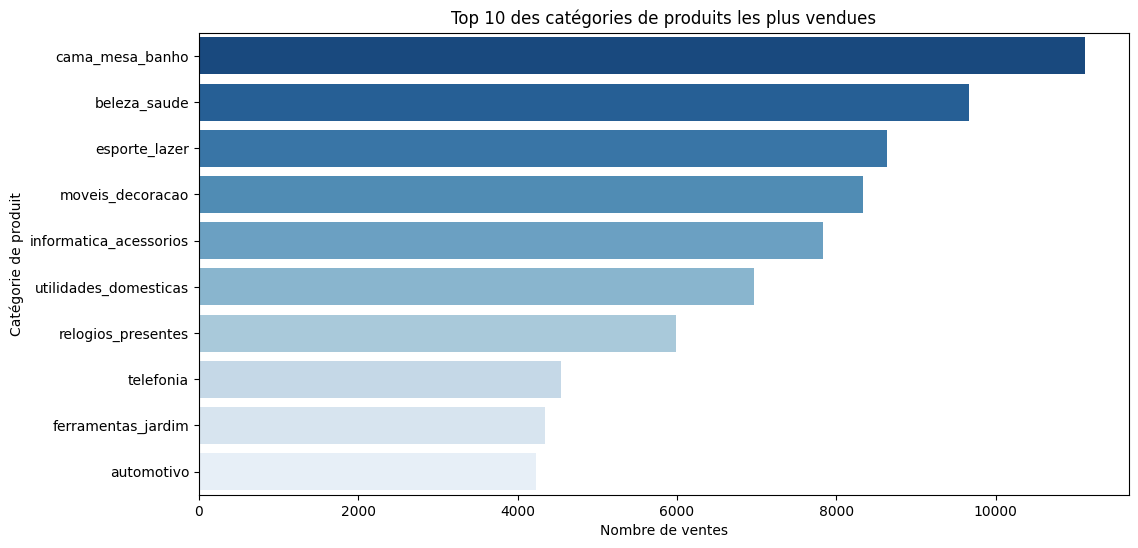

In [153]:
# Top 10 most sold products
top_10=top_products.head(10)
# Graph creation
plt.figure(figsize=(12,6))
sns.barplot(data=top_10, x="nombre_de_ventes", y="product_category_name", palette="Blues_r")
plt.title("Top 10 des catégories de produits les plus vendues")
plt.xlabel("Nombre de ventes")
plt.ylabel("Catégorie de produit")
plt.show()

###Review scores

<ipython-input-154-5b258a8913d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x='review_category', palette='viridis')


Text(0.5, 1.0, 'Répartition des catégories de reviews')

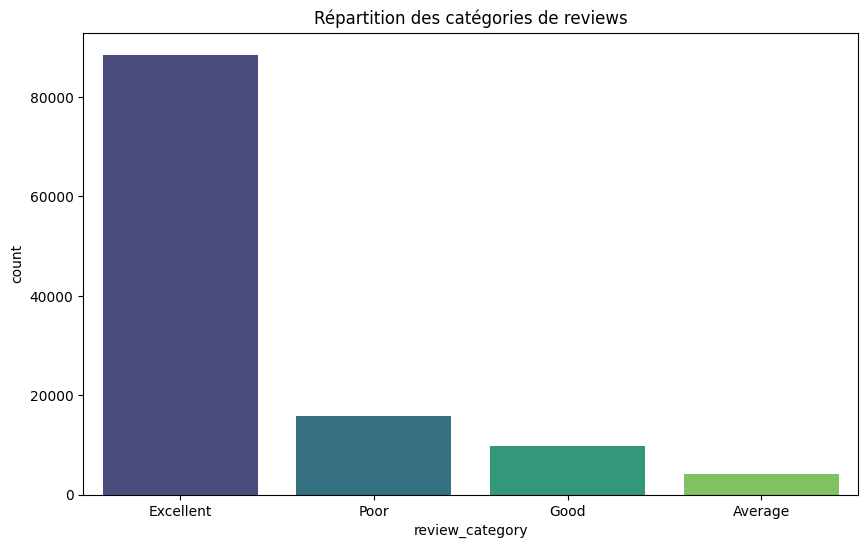

In [154]:
#histogramme for scores review
plt.figure(figsize=(10, 6))
sns.countplot(data=df_all, x='review_category', palette='viridis')
plt.title('Répartition des catégories de reviews')

###Worst product by review score

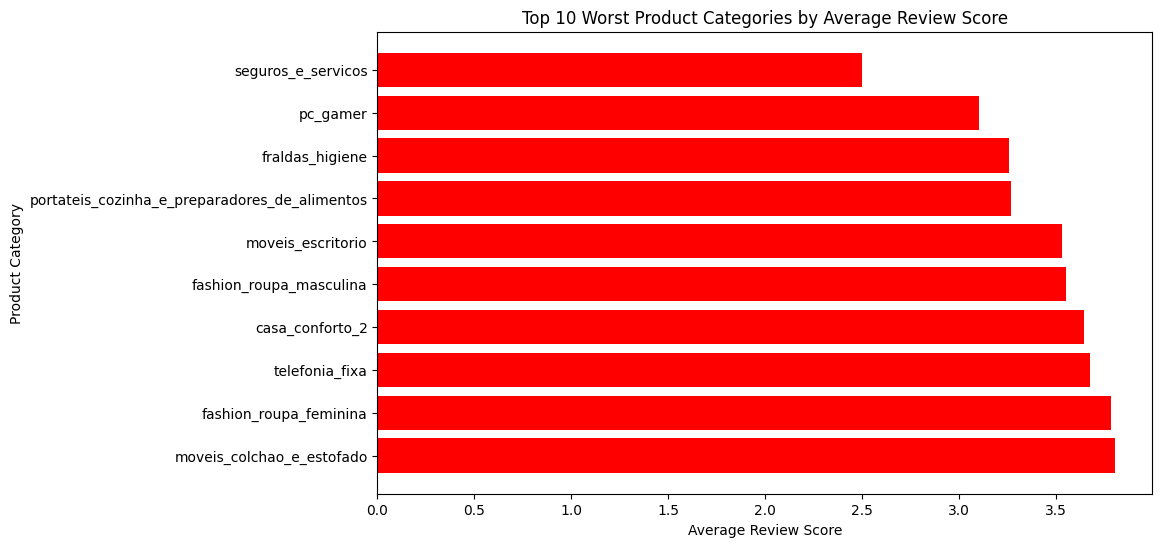

In [155]:
# Group by product_category_name and calculate the mean of review_score
category_avg_score = df_all.groupby('product_category_name')['review_score'].mean().reset_index()

# Sort by review_score and get the 10 worst categories
worst_categories = category_avg_score.sort_values('review_score').head(10)

# Plot a bar chart
plt.figure(figsize=(10,6))
plt.barh(worst_categories['product_category_name'], worst_categories['review_score'], color='red')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Top 10 Worst Product Categories by Average Review Score')
plt.gca().invert_yaxis()  # To display the worst category at the top
plt.show()


###Statistics analysis

In [158]:
df_all.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_category'],
      dtype='object')

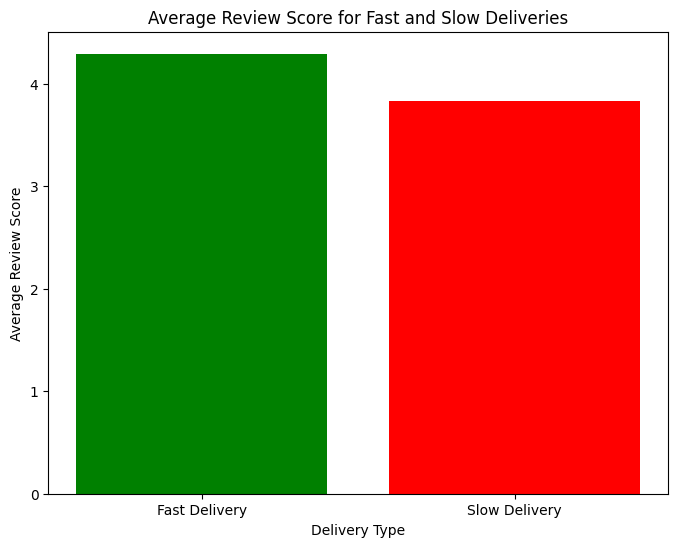

In [160]:
# Calculate delivery time in days
df_all['delivery_time'] = (df_all['order_delivered_customer_date'] - df_all['order_purchase_timestamp']).dt.days

# Remove rows with null values in delivery_time or review_score
df_cleaned = df_all[["delivery_time", "review_score"]].dropna()

# Group orders based on the median delivery time
median_delivery_time = df_cleaned["delivery_time"].median()
fast_delivery = df_cleaned[df_cleaned["delivery_time"] <= median_delivery_time]
slow_delivery = df_cleaned[df_cleaned["delivery_time"] > median_delivery_time]

# Calculate average review scores for fast and slow deliveries
fast_avg_score = fast_delivery["review_score"].mean()
slow_avg_score = slow_delivery["review_score"].mean()

# Create a DataFrame for plotting
delivery_types = ['Fast Delivery', 'Slow Delivery']
avg_scores = [fast_avg_score, slow_avg_score]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(delivery_types, avg_scores, color=['green', 'red'])
plt.xlabel('Delivery Type')
plt.ylabel('Average Review Score')
plt.title('Average Review Score for Fast and Slow Deliveries')
plt.show()


In [163]:
# Student's t-test (checking the difference in satisfaction between fast and slow deliveries)
stat, p_value = ttest_ind(fast_delivery["review_score"], slow_delivery["review_score"], equal_var=False)

# There is a significant difference between fast and slow delivery
# Correlation between delivery time and satisfaction
correlation = df_cleaned["delivery_time"].corr(df_cleaned["review_score"])
correlation

# The analysis shows a direct relationship between delivery speed and customer satisfaction.
# Improving logistics could therefore have a positive impact on customer loyalty and the company’s perception.

-0.30274966625366806

In [164]:
#export csv
df.to_csv('all_data.csv', index=False)  # Save the DataFrame as a CSV file
